# Лабораторная работа №2: Понижение размерности пространства признаков

Выполнил: Колованов Родион Алексеевич, группа 9381.

## Цель

Ознакомиться с методами понижения размерности данных из библиотеки *Scikit Learn*.

## Ход работы

Для начала подключим необходимые библиотеки:

In [471]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import decomposition

### Загрузка данных

Загрузим датасет `glass.csv` в датафрейм и отобразим его:

In [477]:
df = pd.read_csv("glass.csv")
var_names = list(df.columns)

Загруженный датафрейм:

In [478]:
display(df)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Разделим данные на описательные признаки и признак, отображающий класс:

In [473]:
data = df.to_numpy("float")[:,:-1]
labels = df.to_numpy("int")[:,-1]

In [474]:
print("Описательные признаки:", var_names[:-1])
display(data)

Описательные признаки: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [475]:
print("Признак класса: '{}'".format(var_names[-1]))
display(labels)

Признак класса: 'Type'


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

Произведем нормировку данных к интервалу $[0, 1]:

In [476]:
data = preprocessing.minmax_scale(data)

Построим диаграммы рассеяния для пар признаков и определим соответствие цвета на диаграмме и класса в датасете:

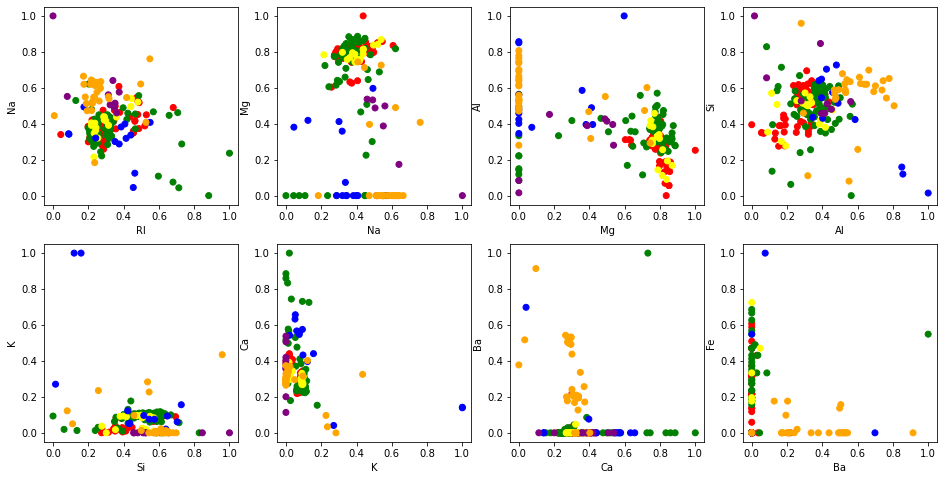

In [204]:
figure, axes = plt.subplots(2, 4, figsize=(16, 8))

cmap = colors.ListedColormap(["red", "green", "yellow", "black", "blue", "purple", "orange"])

for i in range(data.shape[1] - 1):
    axes[i // 4, i % 4].scatter(data[:,i], data[:,i+1], c=labels, cmap=cmap)
    axes[i // 4, i % 4].set_xlabel(var_names[i])
    axes[i // 4, i % 4].set_ylabel(var_names[i + 1])

plt.show()

Сопоставим цвета на диаграмме и классы в датасете:

In [205]:
print("Возможные значения классов:", np.unique(labels), end="\n\n")

print("Красный цвет: класс", labels[np.where(data[:,2] > 0.95)[0]][0])
print("Зеленый цвет: класс", labels[np.where(data[:,6] > 0.95)[0]][0])
print("Желтый цвет: класс", labels[np.where([x > 0.7 and x < 0.8 for x in data[:,8]])[0]][0])
print("Синий цвет: класс", labels[np.where(data[:,3] > 0.95)[0]][0])
print("Фиолетовый цвет: класс", labels[np.where(data[:,1] == 1.0)[0]][0])
print("Оранжевый цвет: класс", labels[np.where([x > 0.8 and x < 0.99 for x in data[:,7]])[0]][0])

Возможные значения классов: [1 2 3 5 6 7]

Красный цвет: класс 1
Зеленый цвет: класс 2
Желтый цвет: класс 3
Синий цвет: класс 5
Фиолетовый цвет: класс 6
Оранжевый цвет: класс 7


### Метод главных компонент

Используя метод главных компонент (PCA), осуществим понижение размерности пространства признаков до размерности 2:

In [214]:
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

Выведем значение объясненной дисперсии в процентах и собственные числа соответствующих компонент:

In [437]:
print("Объясненная дисперсия для компонент:", pca.explained_variance_ratio_)
print("Сумма объясненных дисперсий:", sum(pca.explained_variance_ratio_))
print("Собственные числа для компонент:", pca.singular_values_)

Объясненная дисперсия для компонент: [0.45429569 0.17990097]
Сумма объясненных дисперсий: 0.6341966621042778
Собственные числа для компонент: [5.1049308  3.21245688]


Построим диаграмму рассеяния после метода главных компонент:

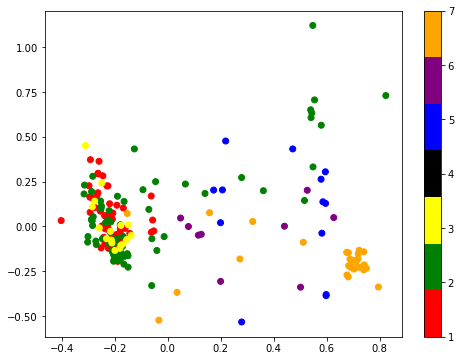

In [216]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap=cmap)
plt.colorbar()
plt.show()

Было осуществлено понижение размерности пространста признаков до с 9 до 2 при помощи PCA. Теперь классам сопостовляется только два признака. По значению объясненной дисперсии можно понять, что первая компонента нового пространства объясняет около 45% дисперсии данных, а вторая - около 18%. В сумме полученное двумерное пространство признаков объясняет около 63% дисперсии данных, что не очень много, поэтому стоит увеличить размерность пространства.

Изменяя количество компонент, определим количество, при котором компоненты объясняют не менее 85% дисперсии данных:

In [217]:
for n in range(2, 9):
    print("Для {} компонент: {}".format(n, sum(decomposition.PCA(n_components = n).fit(data).explained_variance_ratio_)))

Для 2 компонент: 0.6341966621042778
Для 3 компонент: 0.7606912558548661
Для 4 компонент: 0.8586697305102716
Для 5 компонент: 0.9272937149511478
Для 6 компонент: 0.9694347221994032
Для 7 компонент: 0.9955326243472864
Для 8 компонент: 0.9998605862637865


Начиная с четырех компонент, объяснение дисперсии данных составляет более 85%.

Используя метод `inverse_transform`, восстановим данные и сравним их с исходными данными:

In [218]:
pca_data = pca.inverse_transform(pca_data)

In [241]:
diff = np.sum(np.abs(data - pca_data), axis=0) / data.shape[0]
print("Среднее абсолютное отклонение полученных данных от исходных данных по каждому признаку:")
print(diff)

Среднее абсолютное отклонение полученных данных от исходных данных по каждому признаку:
[0.05001985 0.07830227 0.02105253 0.07029623 0.08598882 0.04417383
 0.04180197 0.0693001  0.1252156 ]


Как видно, при обратном преобразовании мы не получили точные исходные данные, а лишь их аппроксимацию, поскольку при преобразовании PCA часть информации была потеряна.

Исследуем метод главных компонент при различных значениях параметра `svd_solver`:

In [481]:
def pca_decomposition(svd_solver: str):
    pca = decomposition.PCA(n_components = 2, svd_solver="auto")
    pca_data = pca.fit(data).transform(data)
    print("Объясненная дисперсия для компонент:", pca.explained_variance_ratio_)
    print("Собственные числа для компонент:", pca.singular_values_)
    print("PC1:", pca.components_[0])
    print("PC2:", pca.components_[1])

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap=cmap)
    plt.colorbar()
    plt.show()

Объясненная дисперсия для компонент: [0.45429569 0.17990097]
Собственные числа для компонент: [5.1049308  3.21245688]
PC1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


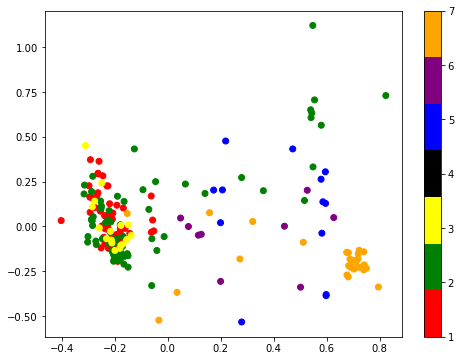

In [482]:
pca_decomposition("auto")

Объясненная дисперсия для компонент: [0.45429569 0.17990097]
Собственные числа для компонент: [5.1049308  3.21245688]
PC1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


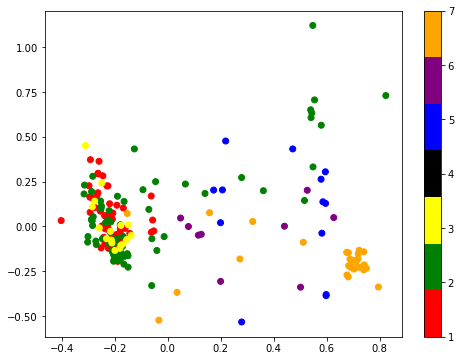

In [483]:
pca_decomposition("full")

Объясненная дисперсия для компонент: [0.45429569 0.17990097]
Собственные числа для компонент: [5.1049308  3.21245688]
PC1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


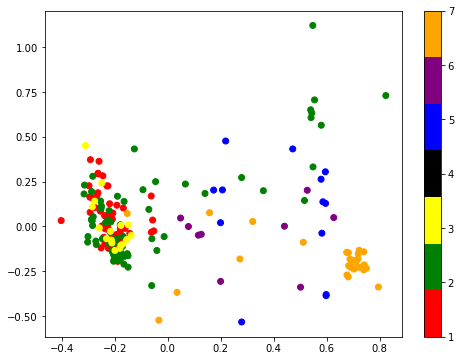

In [484]:
pca_decomposition("arpack")

Объясненная дисперсия для компонент: [0.45429569 0.17990097]
Собственные числа для компонент: [5.1049308  3.21245688]
PC1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


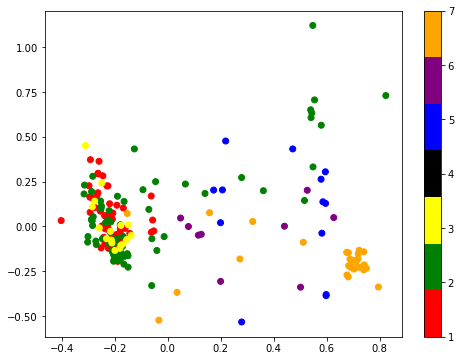

In [485]:
pca_decomposition("randomized")

Из документации было выяснено, что параметр `svd_solver` позволяет выбрать метод сингулярного разложения. Значение `auto` позволяет автоматически выбрать значение параметра `svd_solver` (выбор осуществляется в зависимости от `shape` данных and `n_components`). Между значениями `full`, `arpack` и `randomized` различий на данном датасете замечено не было. Предположительно, данный параметр влияет на скорость вычисления SVD.

### Модификации метода главных компонент

По аналогии с `PCA`, исследуем `KernelPCA` для различных параметров `kernel` и различных параметрах для ядра:

#### Линейное ядро

Ядерная функция имеет следующий вид:

$$ K(X, Y) = XY^T $$

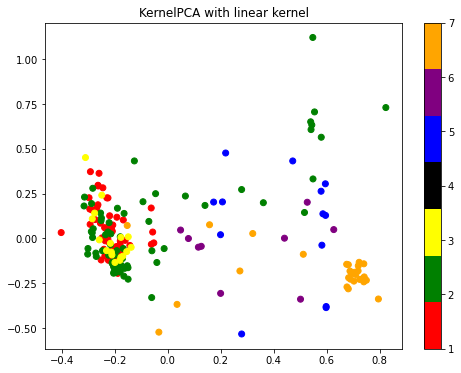

Дисперсия компонент: [0.12234891 0.04845014]
Объясненная дисперсия для компонент: [0.45429569 0.17990097]


In [488]:
kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="linear")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
plt.title("KernelPCA with linear kernel")
plt.colorbar()
plt.show()

print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))

explained_var = decomposition.KernelPCA(n_components = 9, kernel="linear").fit(data).eigenvalues_
print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

#### Полиномиальное ядро

Ядерная функция имеет следующий вид:

$$ K(X, Y) = (gamma \cdot XY^T + {coef}_0) ^ {degree} $$

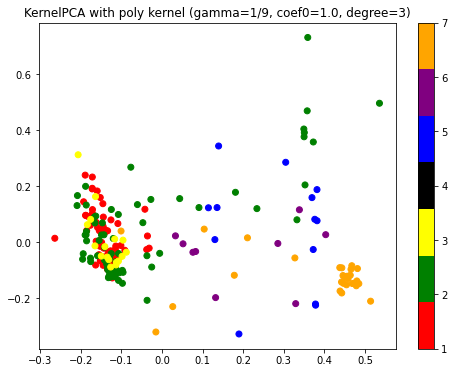

Дисперсия компонент: [0.05125914 0.02027877]
Объясненная дисперсия для компонент: [0.44729505 0.17695559]


In [491]:
kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="poly")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
plt.title("KernelPCA with poly kernel (gamma=1/9, coef0=1.0, degree=3)")
plt.colorbar()
plt.show()

print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))

explained_var = decomposition.KernelPCA(n_components = 9, kernel="poly").fit(data).eigenvalues_
print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

`KernelPCA` с линейным ядром дает нам такие же значения дисперсий и объясненных дисперсий компонент, что и `PCA`.

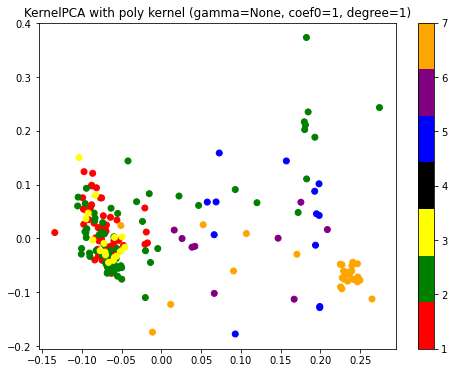

Дисперсия компонент: [0.01359432 0.00538335]
Объясненная дисперсия для компонент: [0.45429569 0.17990097]


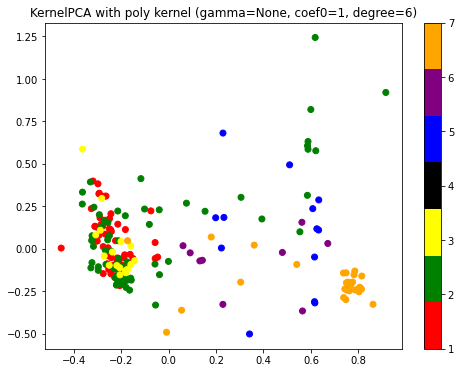

Дисперсия компонент: [0.14483814 0.05769737]
Объясненная дисперсия для компонент: [0.4329858  0.17248317]


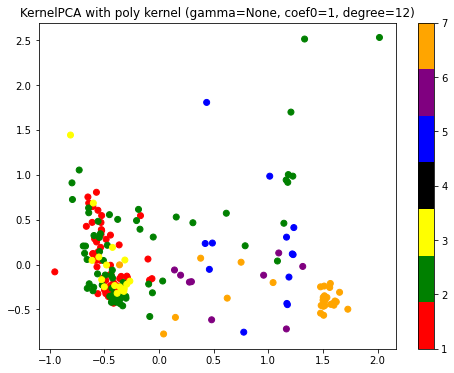

Дисперсия компонент: [0.58420547 0.24552087]
Объясненная дисперсия для компонент: [0.39723155 0.16694235]


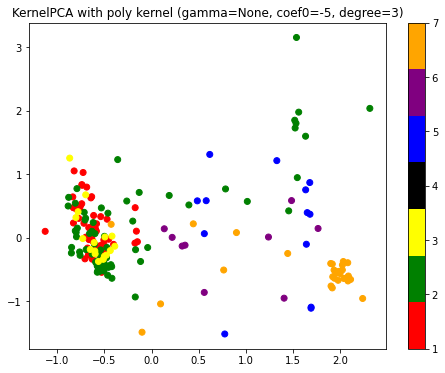

Дисперсия компонент: [0.97089045 0.38471188]
Объясненная дисперсия для компонент: [0.45514511 0.18034963]


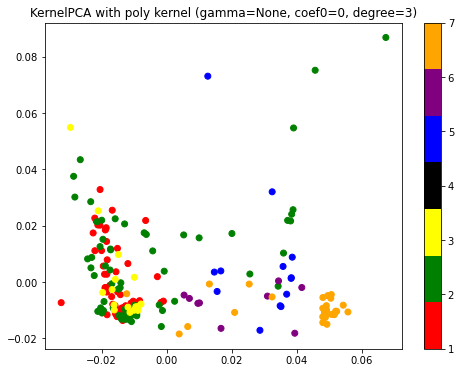

Дисперсия компонент: [0.00061673 0.00027373]
Объясненная дисперсия для компонент: [0.37245434 0.16531013]


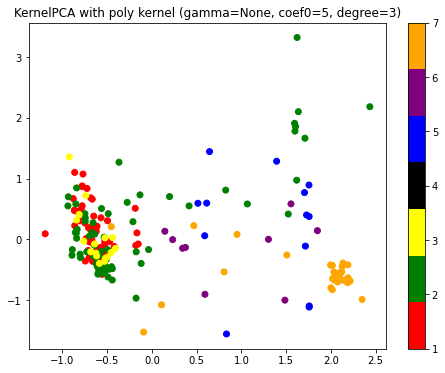

Дисперсия компонент: [1.06949037 0.42332364]
Объясненная дисперсия для компонент: [0.45290147 0.17926659]


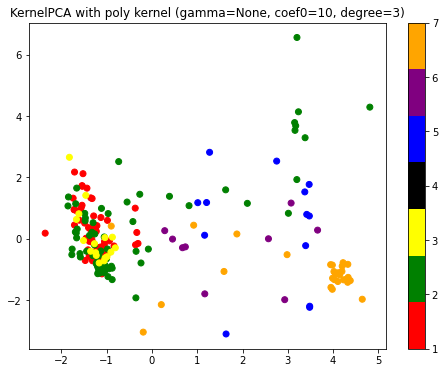

Дисперсия компонент: [4.17751314 1.65388263]
Объясненная дисперсия для компонент: [0.45362348 0.1795901 ]


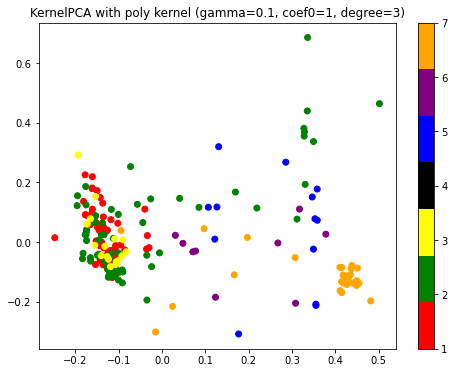

Дисперсия компонент: [0.04514046 0.01785756]
Объясненная дисперсия для компонент: [0.44800738 0.17723172]


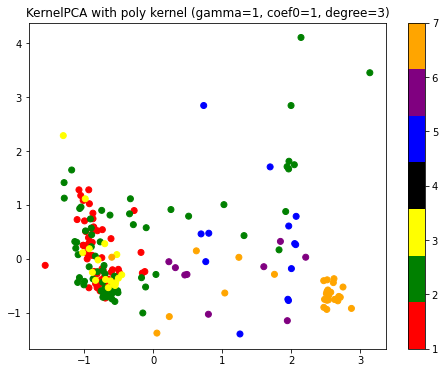

Дисперсия компонент: [1.61504676 0.65593406]
Объясненная дисперсия для компонент: [0.41269733 0.16761263]


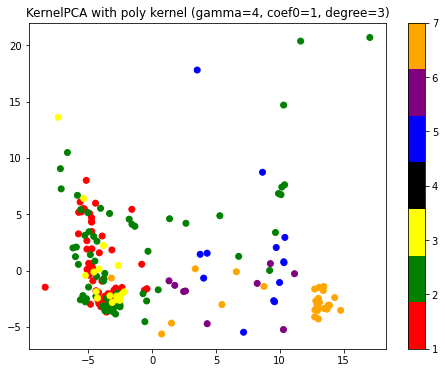

Дисперсия компонент: [43.01366283 18.33178165]
Объясненная дисперсия для компонент: [0.38788837 0.16531224]


In [497]:
def poly_kernel_pca_decomposition(gamma=None, coef0=1, degree=3):
    kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="poly", gamma=gamma, degree=degree, coef0=coef0)
    kernel_pca_data = kernel_pca.fit(data).transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
    plt.title("KernelPCA with poly kernel (gamma={}, coef0={}, degree={})".format(gamma, coef0, degree))
    plt.colorbar()
    plt.show()

    print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))

    explained_var = decomposition.KernelPCA(n_components = 9, kernel="poly",
                                            gamma=gamma, degree=degree, coef0=coef0).fit(data).eigenvalues_
    print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

poly_kernel_pca_decomposition(degree=1)
poly_kernel_pca_decomposition(degree=6)
poly_kernel_pca_decomposition(degree=12)
poly_kernel_pca_decomposition(coef0=-5)
poly_kernel_pca_decomposition(coef0=0)
poly_kernel_pca_decomposition(coef0=5)
poly_kernel_pca_decomposition(coef0=10)
poly_kernel_pca_decomposition(gamma=0.1)
poly_kernel_pca_decomposition(gamma=1)
poly_kernel_pca_decomposition(gamma=4)

`KernelPCA` с полиномиальным ядром дает нам более низкую объясненную дисперсию при увеличении параметров `degree` и `gamma`, и при приближении параметра `coef0` к `0`.

#### Ядро радиальной базисной функции (EBF)

Ядерная функция имеет следующий вид:

$$ K(X, Y) = e^{-gamma \cdot ||X - Y||^2} $$

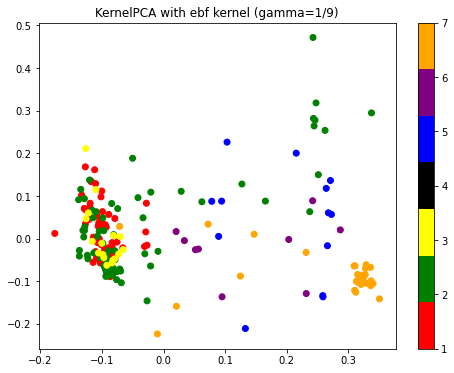

Дисперсия компонент: [0.02512419 0.00947443]
Объясненная дисперсия для компонент: [0.4559278 0.1719322]


In [500]:
kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="rbf")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
plt.title("KernelPCA with ebf kernel (gamma=1/9)")
plt.colorbar()
plt.show()

print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))
explained_var = decomposition.KernelPCA(n_components = 9, kernel="rbf").fit(data).eigenvalues_
print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

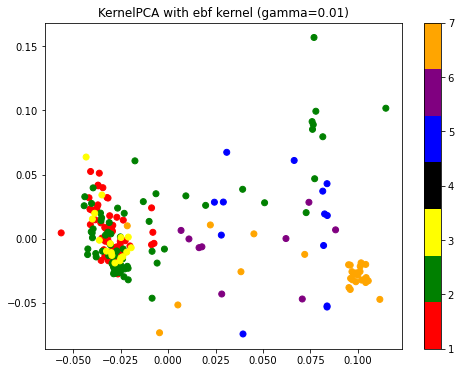

Дисперсия компонент: [0.00242929 0.00095739]
Объясненная дисперсия для компонент: [0.45455948 0.17914391]


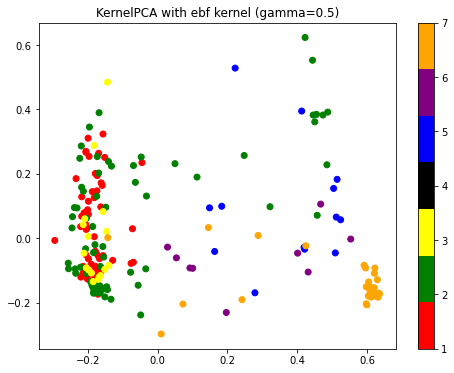

Дисперсия компонент: [0.08785592 0.03020902]
Объясненная дисперсия для компонент: [0.4530983  0.15579662]


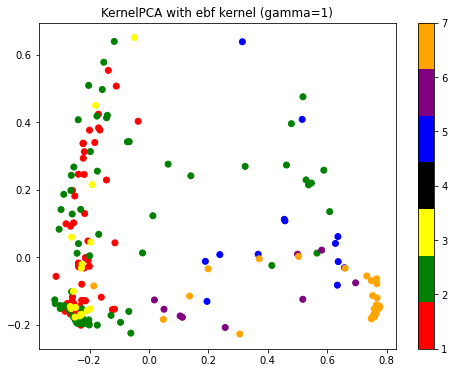

Дисперсия компонент: [0.13247653 0.04688054]
Объясненная дисперсия для компонент: [0.44474955 0.15738712]


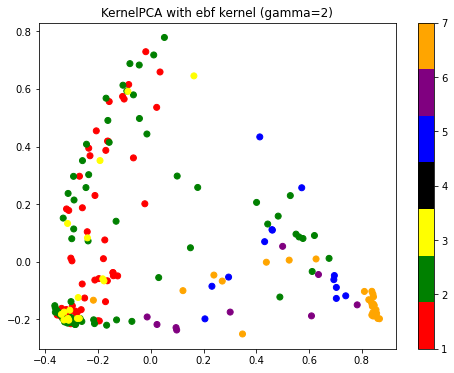

Дисперсия компонент: [0.16642974 0.06875746]
Объясненная дисперсия для компонент: [0.41923273 0.17319848]


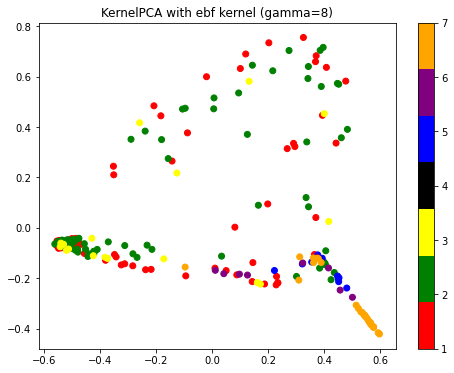

Дисперсия компонент: [0.16642412 0.08208434]
Объясненная дисперсия для компонент: [0.35587568 0.17552635]


In [499]:
def ebf_kernel_pca_decomposition(gamma=None):
    kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="rbf", gamma=gamma)
    kernel_pca_data = kernel_pca.fit(data).transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
    plt.title("KernelPCA with ebf kernel (gamma={})".format(gamma))
    plt.colorbar()
    plt.show()

    print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))

    explained_var = decomposition.KernelPCA(n_components = 9, kernel="rbf",
                                            gamma=gamma).fit(data).eigenvalues_
    print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

ebf_kernel_pca_decomposition(gamma=0.01)
ebf_kernel_pca_decomposition(gamma=0.5)
ebf_kernel_pca_decomposition(gamma=1)
ebf_kernel_pca_decomposition(gamma=2)
ebf_kernel_pca_decomposition(gamma=8)

`KernelPCA` с ядром EBF дает нам более низкую объясненную дисперсию при увеличении параметра `gamma`.

#### Сигмоидное ядро

Ядерная функция имеет следующий вид:

$$ K(X, Y) = tanh(gamma \cdot XY^T + {coef}_0) $$

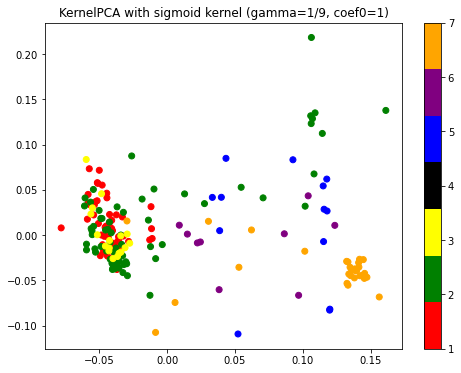

Дисперсия компонент: [0.00472385 0.00187717]
Объясненная дисперсия для компонент: [0.45732276 0.18173151]


In [501]:
kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="sigmoid")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
plt.title("KernelPCA with sigmoid kernel (gamma=1/9, coef0=1)")
plt.colorbar()
plt.show()

print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))
explained_var = decomposition.KernelPCA(n_components = 9, kernel="sigmoid").fit(data).eigenvalues_
print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

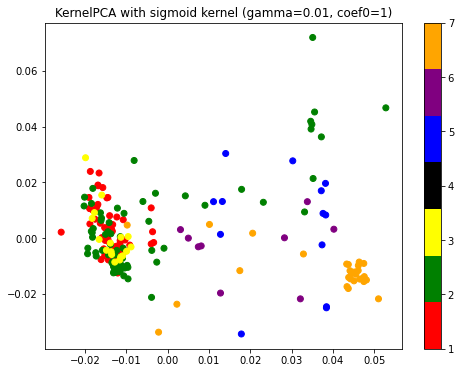

Дисперсия компонент: [0.00050537 0.00020016]
Объясненная дисперсия для компонент: [0.4545888  0.18005208]


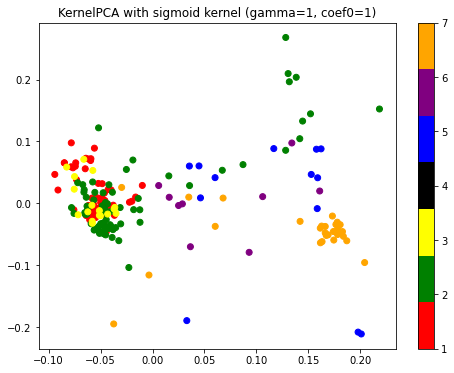

Дисперсия компонент: [0.00775599 0.00361472]
Объясненная дисперсия для компонент: [0.44756994 0.20859217]


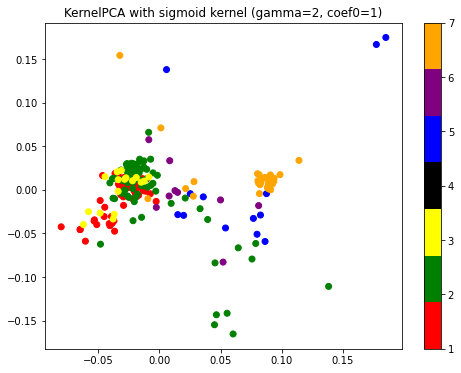

Дисперсия компонент: [0.00227404 0.00155736]
Объясненная дисперсия для компонент: [0.36034951 0.24678241]


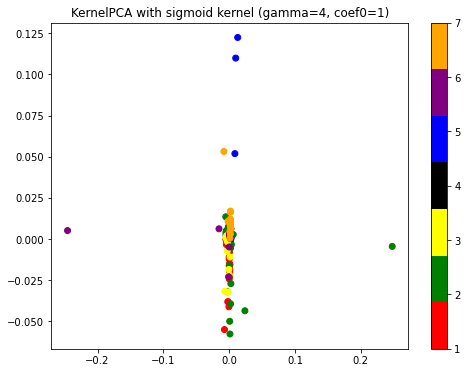

Дисперсия компонент: [0.00058157 0.00030102]
Объясненная дисперсия для компонент: [0.45017211 0.23301106]


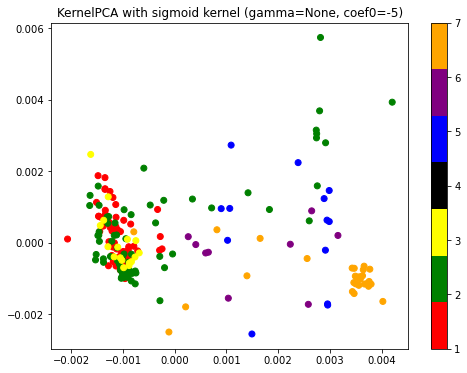

Дисперсия компонент: [3.14629664e-06 1.24582127e-06]
Объясненная дисперсия для компонент: [0.44595899 0.17658386]


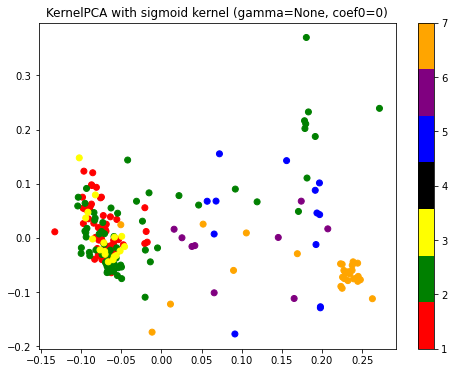

Дисперсия компонент: [0.01339292 0.00530164]
Объясненная дисперсия для компонент: [0.4550205  0.18012169]


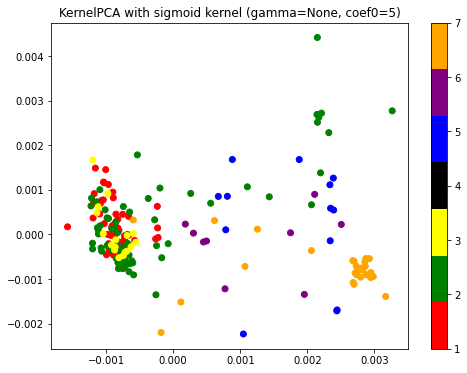

Дисперсия компонент: [1.94006048e-06 7.72155858e-07]
Объясненная дисперсия для компонент: [0.45782986 0.18221907]


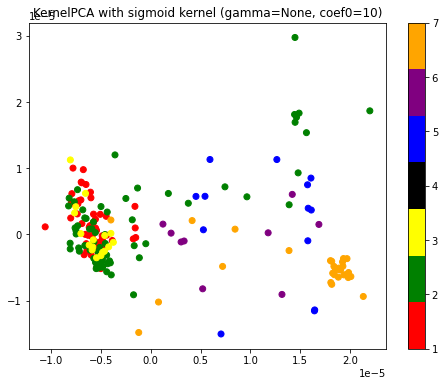

Дисперсия компонент: [8.80849047e-11 3.50583488e-11]
Объясненная дисперсия для компонент: [0.45783004 0.18221925]


In [502]:
def sigmoid_kernel_pca_decomposition(gamma=None, coef0=1):
    kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="sigmoid", gamma=gamma, coef0=coef0)
    kernel_pca_data = kernel_pca.fit(data).transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
    plt.title("KernelPCA with sigmoid kernel (gamma={}, coef0={})".format(gamma, coef0))
    plt.colorbar()
    plt.show()

    print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))
    explained_var = decomposition.KernelPCA(n_components = 9, kernel="sigmoid",
                                            gamma=gamma, coef0=coef0).fit(data).eigenvalues_
    print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

sigmoid_kernel_pca_decomposition(gamma=0.01)
sigmoid_kernel_pca_decomposition(gamma=1)
sigmoid_kernel_pca_decomposition(gamma=2)
sigmoid_kernel_pca_decomposition(gamma=4)
sigmoid_kernel_pca_decomposition(coef0=-5)
sigmoid_kernel_pca_decomposition(coef0=0)
sigmoid_kernel_pca_decomposition(coef0=5)
sigmoid_kernel_pca_decomposition(coef0=10)

`KernelPCA` с сигмоидным ядром дает нам более низкую объясненную дисперсию при увеличении параметра `gamma` и при уменьшении параметра `coef0`.

#### Косинусное ядро

Ядерная функция имеет следующий вид:

$$ K(X, Y) =  \frac{XY^T}{||X|| \cdot ||Y||}  $$

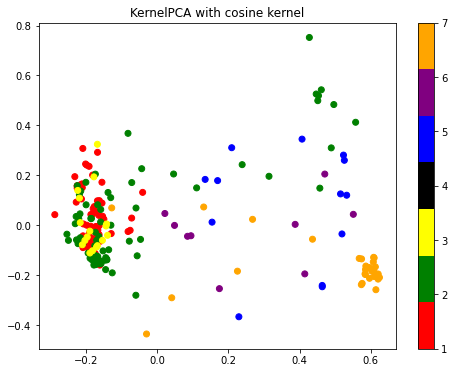

Дисперсия компонент: [0.08598136 0.03040087]
Объясненная дисперсия для компонент: [0.47632626 0.1684171 ]


In [503]:
kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="cosine")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
plt.colorbar()
plt.title("KernelPCA with cosine kernel")
plt.show()

print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))
explained_var = decomposition.KernelPCA(n_components = 9, kernel="cosine").fit(data).eigenvalues_
print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

`KernelPCA` с косинусным ядром дает нам более высокую объясненную дисперсию, чем `PCA`.

Определим, при каких параметрах `KernelPCA` работает так же, как `PCA`.

Поскольку `PCA` является линейным, то для `KernelPCA` с линейным ядром работает так же, как `PCA`. По мимо этого, полиномиальное ядро можно сделать линейным. Отсюда `KernelPCA` c полиномиальным ядром (с параметрами `gamma=1, coef0=0, degree=1`) работает так же, как `PCA`.

Подтвердим это:

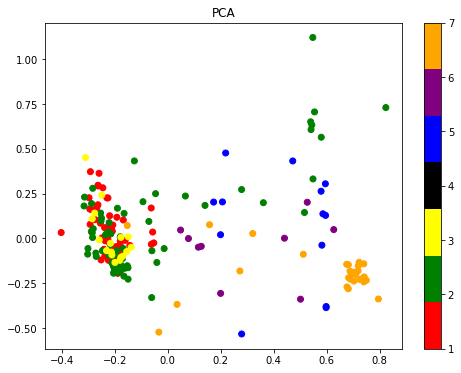

Дисперсия компонент: [0.12234891 0.04845014]
Объясненная дисперсия компонент: [0.45429569 0.17990097]


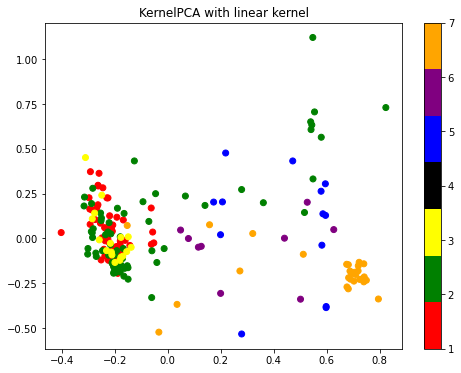

Дисперсия компонент: [0.12234891 0.04845014]
Объясненная дисперсия для компонент: [0.45429569 0.17990097]


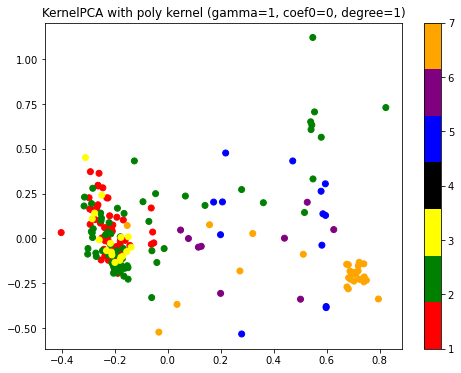

Дисперсия компонент: [0.12234891 0.04845014]
Объясненная дисперсия для компонент: [0.45429569 0.17990097]


In [504]:
# PCA
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap=cmap)
plt.title("PCA")
plt.colorbar()
plt.show()

print("Дисперсия компонент:", pca.explained_variance_)
print("Объясненная дисперсия компонент:", pca.explained_variance_ratio_)

# Линейное ядро
kernel_pca = decomposition.KernelPCA(n_components = 2, kernel="linear")
kernel_pca_data = kernel_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(kernel_pca_data[:,0], kernel_pca_data[:,1], c=labels, cmap=cmap)
plt.title("KernelPCA with linear kernel")
plt.colorbar()
plt.show()

print("Дисперсия компонент:", kernel_pca.eigenvalues_ / (data.shape[0] - 1))

explained_var = decomposition.KernelPCA(n_components = 9, kernel="linear").fit(data).eigenvalues_
print("Объясненная дисперсия для компонент:", kernel_pca.eigenvalues_ / sum(explained_var))

# Полиномиальное ядро
poly_kernel_pca_decomposition(gamma=1, coef0=0, degree=1)

Аналогично исследованию `KernelPCA` исследуем `SparsePCA`:

`SparsePCA` находит набор разреженных компонентов, которые могут оптимально реконструировать данные. Степень разреженности регулируется параметром `alpha`.

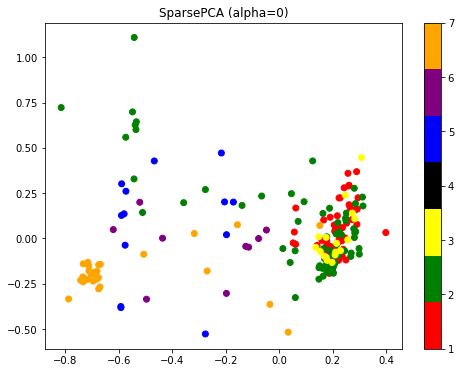

PC1: [-0.03420952 -0.11044243  0.90903503 -0.24901968 -0.05079549  0.00269769
 -0.14094732 -0.26682812  0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


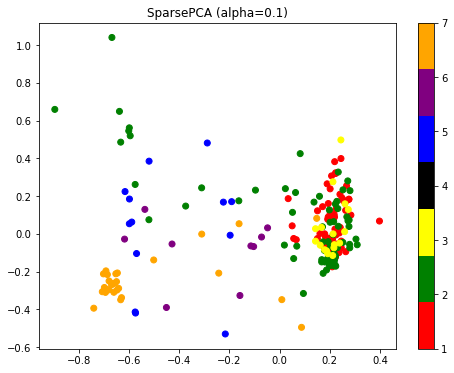

PC1: [-0.06654491 -0.0714373   0.92832019 -0.20259079 -0.00954142  0.
 -0.17582718 -0.23799337  0.        ]
PC2: [ 0.50469306 -0.19935608  0.         -0.36452857 -0.21230028 -0.09495474
  0.47606897 -0.16947597  0.51303938]


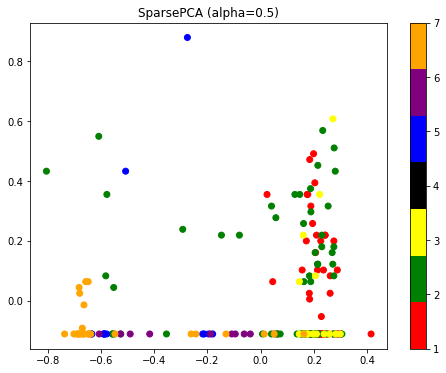

PC1: [ 0.         -0.00114361  0.96521758 -0.17310136  0.          0.
 -0.06057    -0.18633549  0.        ]
PC2: [0. 0. 0. 0. 0. 0. 0. 0. 1.]


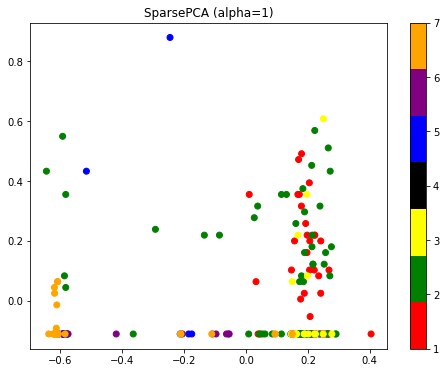

PC1: [ 0.          0.          0.99804243 -0.03718353  0.          0.
  0.         -0.0502861   0.        ]
PC2: [0. 0. 0. 0. 0. 0. 0. 0. 1.]


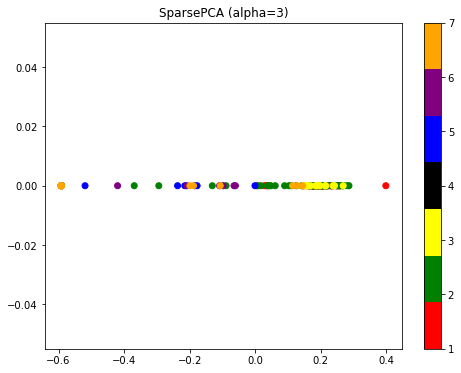

PC1: [0. 0. 1. 0. 0. 0. 0. 0. 0.]
PC2: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


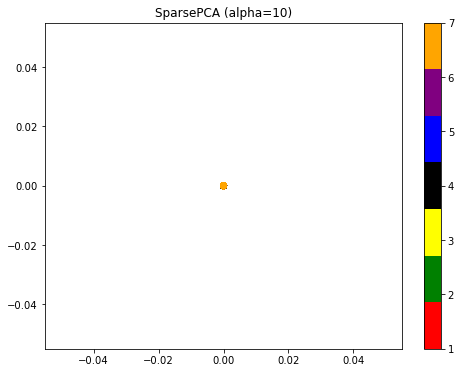

PC1: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
PC2: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [505]:
def sparse_pca_decomposition(alpha=1):
    sparse_pca = decomposition.SparsePCA(n_components = 2, alpha=alpha)
    sparse_pca_data = sparse_pca.fit(data).transform(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(sparse_pca_data[:,0], sparse_pca_data[:,1], c=labels, cmap=cmap)
    plt.title("SparsePCA (alpha={})".format(alpha))
    plt.colorbar()
    plt.show()

    print("PC1:", sparse_pca.components_[0])
    print("PC2:", sparse_pca.components_[1])

sparse_pca_decomposition(alpha=0)
sparse_pca_decomposition(alpha=0.1)
sparse_pca_decomposition(alpha=0.5)
sparse_pca_decomposition(alpha=1)
sparse_pca_decomposition(alpha=3)
sparse_pca_decomposition(alpha=10)

Более высокие значения `alpha` приводят к более разреженным компонентам. 

При `alpha = 0` и обращении первой компоненты (домножении на `-1`) `SparsePCA` работает так же, как `PCA`. Продемонстрируем это:

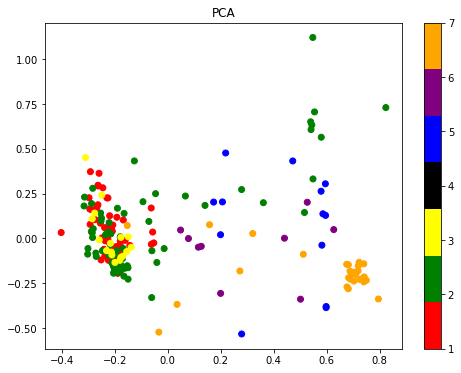

PC1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


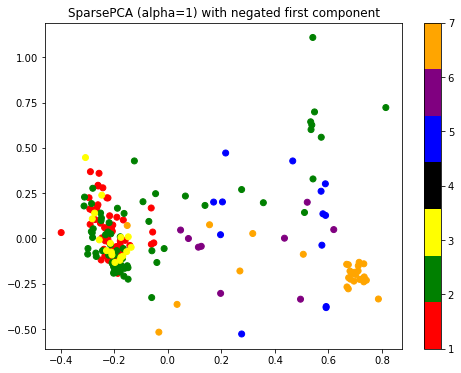

PC1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
PC2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


In [510]:
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap=cmap)
plt.title("PCA")
plt.colorbar()
plt.show()

print("PC1:", pca.components_[0])
print("PC2:", pca.components_[1])

sparse_pca = decomposition.SparsePCA(n_components = 2, alpha=0)
sparse_pca_data = sparse_pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(sparse_pca_data[:,0] * -1, sparse_pca_data[:,1], c=labels, cmap=cmap)
plt.title("SparsePCA (alpha=1) with negated first component")
plt.colorbar()
plt.show()

print("PC1:", sparse_pca.components_[0] * -1)
print("PC2:", sparse_pca.components_[1])

### Факторный анализ

Проведем понижении размерности, используя факторный анализ:

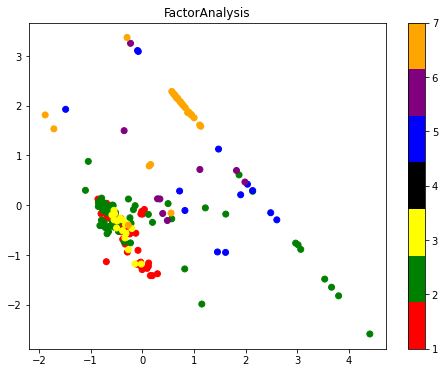

PC1: [ 0.0822624  -0.00702332 -0.25166135  0.00813362 -0.009126   -0.02324994
  0.11894473  0.02528665  0.00884082]
PC2: [-0.07827948  0.0629093  -0.19733579  0.11089294  0.04822956  0.02845741
 -0.05659645  0.0932882  -0.03691294]


In [514]:
factor_analysis = decomposition.FactorAnalysis(n_components=2)
factor_analysis_data = factor_analysis.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(factor_analysis_data[:,0], factor_analysis_data[:,1], c=labels, cmap=cmap)
plt.title("FactorAnalysis")
plt.colorbar()
plt.show()

print("PC1:", factor_analysis.components_[0])
print("PC2:", factor_analysis.components_[1])

Сравним полученные результаты с `PCA`:

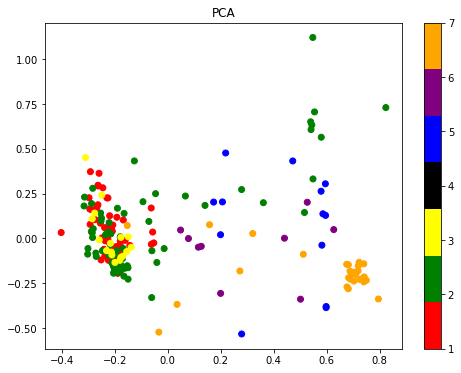

C1: [ 0.03420952  0.11044243 -0.90903503  0.24901968  0.05079549 -0.00269769
  0.14094732  0.26682812 -0.06801349]
C2: [ 0.51327262 -0.19867029 -0.11710045 -0.34736315 -0.21642569 -0.12930091
  0.50234458 -0.16429176  0.46883578]


In [516]:
pca = decomposition.PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels, cmap=cmap)
plt.title("PCA")
plt.colorbar()
plt.show()

print("C1:", pca.components_[0])
print("C2:", pca.components_[1])

Факторный анализ отличается от метода главных компонент тем, что в его основе лежит предположение о некотором небольшом количестве скрытых переменных (общих факторов), которые не могут быть измерены прямо. В PCA главные компоненты являются линейными функциями от наблюдаемых переменных, в то время как общие факторы не выражаются через комбинацию наблюдаемых переменных. В факторном анализе исходные данные являются линейной комбинацией факторов с некоторой ошибкой. Помимо этого, главные компоненты `PCA` обязательно образуют ортогональный базис, а факторы `FactorAnalysis` - нет.

В простейшем случае, когда у нас одна главная компонента, модель `PCA` будет выглядеть следующим образом ($Y_i$ - исходные данные, $w_i$ - некоторые веса, $C$ - главная компонента):
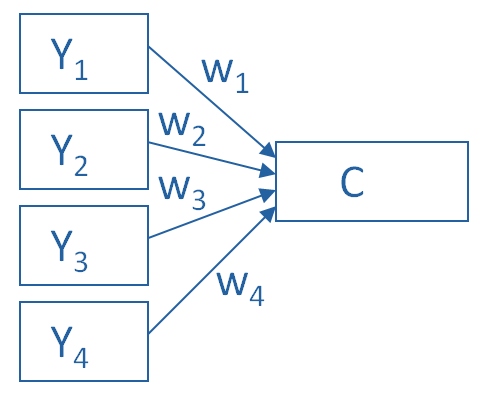

В случае же факторного анализа, когда у нас одна скрытая переменная (фактор), модель будет выглядеть следующим образом ($F$ - фактор, $b_i$ - некоторые веса, $Y_i$ - исходные данные, $u_i$ - ошибки):
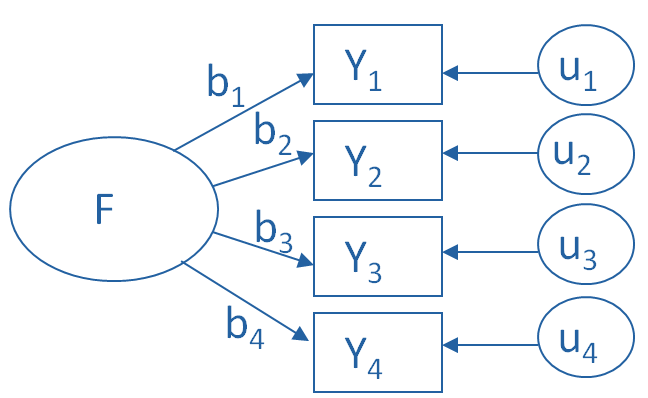

Модель факторного анализа предполагает, что корреляции между наблюдаемыми переменными получаются благодаря их связи с некоторыми общими факторами. Дисперсия исходных переменных здесь объясняется не в полном объеме: считается, что часть дисперсии остается нераспознанной как характерность.

## Вывод

В ходе выполнения лабораторной работы были рассмотрены методы понижения размерности данных из библиотеки `Scikit Learn`.

Были рассмотрены:
- Метод главных компонент (`PCA`);
- Модифицированные методы `PCA` (`KernelPCA` для различных ядерных функций и `SparsePCA`);
- Метод факторного анализа.